# Get top-regulated genes for Reactome Gene list analysis

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('pdcd1.csv')

In [58]:
df.head()

,Gene,MetaP
0,A1BG,0.508638
1,A1CF,-2.657577
2,A2M,11.769551
3,A2ML1,0.148742
4,A3GALT2,0.173925


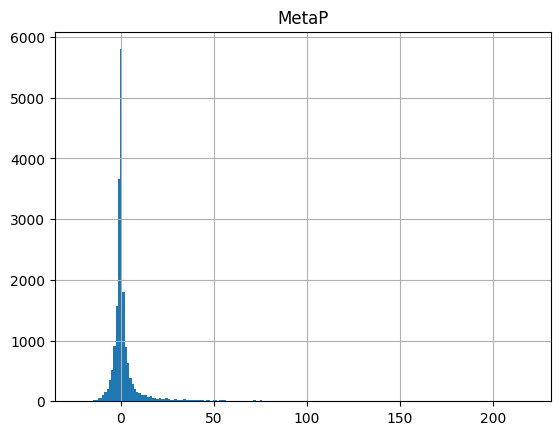

In [59]:
df.hist(bins=200);

In [60]:
# quantile
q_lo = 0.05
q_hi = 0.85

In [61]:
# Finding the 25th and 75th quantiles
thr_lo = df['MetaP'].quantile(0.05)
thr_hi = df['MetaP'].quantile(0.85)

In [62]:
thr_lo, thr_hi # treshold

(-4.958607315, 4.620712928299987)

In [63]:
# Getting top 25% and bottom 25% data
hi = df[df['MetaP'] >= thr_hi]
lo = df[df['MetaP'] <= thr_lo]

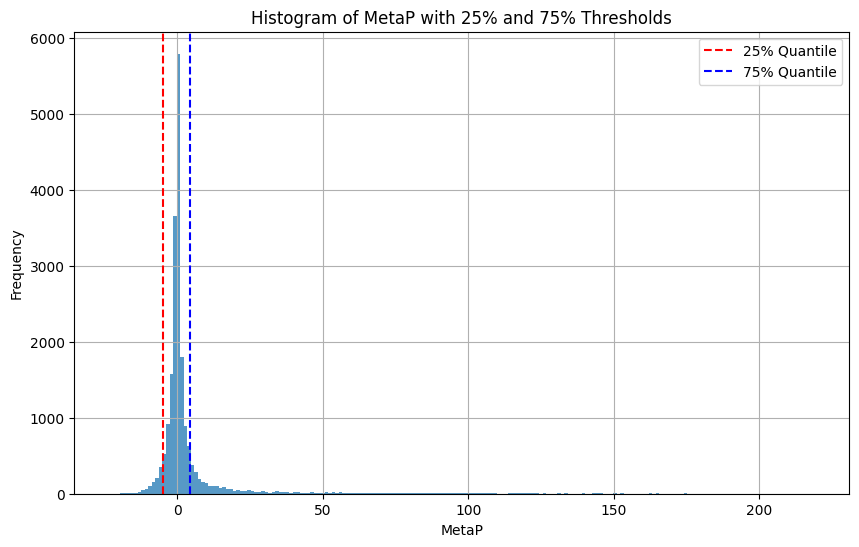

In [64]:
# Plotting histogram
ax = df['MetaP'].hist(bins=200, alpha=0.75, figsize=(10, 6))
ax.set_title('Histogram of MetaP with 25% and 75% Thresholds')
ax.set_xlabel('MetaP')
ax.set_ylabel('Frequency')

# Drawing threshold lines for 25% and 75% quantiles
ax.axvline(thr_lo, color='r', linestyle='--', label='25% Quantile')
ax.axvline(thr_hi, color='b', linestyle='--', label='75% Quantile')

# Adding legend
ax.legend()

# Show plot
plt.show()

In [65]:
hi

,Gene,MetaP
2,A2M,11.769551
9,ABCA1,9.050610
17,ABCA6,12.000000
18,ABCA7,23.568636
20,ABCA9,10.004365
...,...,...
19622,ZNF746,6.229148
19637,ZNF804A,38.508638
19651,ZNF831,159.853872
19662,ZPLD1,4.853872


In [66]:
hi.shape

(2954, 2)

In [67]:
lo.shape

(989, 2)

In [68]:
df.shape

(19694, 2)

In [69]:
hi.to_csv('hi_pdcd1.csv',index=False)
lo.to_csv('lo_pdcd1.csv',index=False)